# COMPUTER ASSIGNMENT 03
This assignment is intended to review 
- the concept related to image resizing, by asking you to generate a **pyramid representation**
- multiresolution representation using pyramid
- multiresolution representation using **wavelet transforms**
- compare the **representation efficiency** of pyramid vs. wavelet 
- compare the **denoising** performance of different methods

## PART 1

**a)**  Pyramid generation, reconstruction, and representation efficiency.
Write a function that can simultaneously generate a 3-level Gaussian and Laplacian Pyramid for a given image. You could use the cv2.resize( ) function, both for down sampling, and for up sampling. Use the “INTER_LINEAR” for downsampling filter; use the “INTER_CUBIC” for upsampling filter. You can choose how to store and display the different levels of the pyramids.

**b)**  Write a function that can reconstruct an image from the Laplacian pyramid. 

**c)**  Write a function that
**i)** reads a gray scale image (or using only the luminance component of a color image), **ii)** generate the Gaussian and Laplacian pyramids using the function from part a); **iii)** Quantize the pixels in the Laplacian pyramid with a quantization stepsize Q. The dequantized value for a pixel in the Laplacian pyramid with value f can be determined from

Q(f)=floor( (f-mean+Q/2)/Q) *Q+mean

You can assume mean = 0 for the Laplacian images and mean = 128 for the very top image of the pyramid.
**iv)** Count the number of non-zero pixels in the pyramid after quantization; **v)** reconstruct the image from the thresholded Laplacian pyramid using the function from part b); **vi)** Compute the PSNR between the reconstructed image and the original image using
PSNR (dB)=10 log_10 ( 255^2/MSE), where MSE is the mean of the squared error between original and reconstructed pixels.
The function should take the image and threshold as input, and return the reconstructed image, the number of non-zeros and PSNR of the reconstructed image.

**d)**  Write a main program that reads in an image, and calls the function in part c) repeatedly with different values for Q, with Q=2^n, n=0,1,…, and plot a curve of PSNR vs number of non-zeros. Such a curve evaluates the representation efficiency of the Laplacian pyramid. Here we use the number of non-zeros as a surrogate for the number of bits needed to describe the non-zero coefficients. 

**Note: If your functions from part (a) and (b) are not working, you can use other python built in functions to solve (c) and (d)**

In [113]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import cv2
import pywt
%matplotlib inline

### PART 1

In [198]:
# generate the Gaussian and Laplacian pyramids for the image
# INPUT: image
# OUTPUT:  Gaussian and Laplacian pyramids
def pyramid(img):

    gp = []  # Store the Gaussian pyramid
    lp = []  # Store the Laplacian pyramid
    ##########################################    [TODO]    ##########################################
    # Use cv2.resize() to get the Gaussian Pyramid
    y, x = img.shape
    g1 = img # bottom level
    gp.append(g1)
    g2 = cv2.resize(g1,(x//2,y//2), fx=0, fy=0, interpolation=cv2.INTER_LINEAR)       # middle level
    gp.append(g2)
    g3 = cv2.resize(g2,(x//4,y//4), fx=0, fy=0, interpolation=cv2.INTER_LINEAR)       # top level
    gp.append(g3)
    ##########################################    [TODO]    ##########################################
    # Get the Laplacian Pyramid correspondingly
    l1 = g1 - cv2.resize(g2, (x,y), fx=0, fy=0, interpolation=cv2.INTER_CUBIC)       # bottom level
    lp.append(l1)
    l2 = g2 - cv2.resize(g3, (x//2,y//2), fx=0, fy=0, interpolation=cv2.INTER_CUBIC)       # middle level
    lp.append(l2)
    l3 = g3       # top level
    lp.append(l3)
    # RETURN GAUSSIAN AND LAPLACIAN PYRAMID 
    return gp, lp

In [199]:
# reconstruct the image from Laplacian Pyramid
# INPUT: Laplacian pyramid
# OUTPUT:  reconstructed image
def reconstruct_lp(lp):
    ##########################################    [TODO]    ##########################################
    # reconstruct the image from the Laplacian pyramid
    # Use cv2.resize() to upsample the pyramid
    y, x = lp[0].shape
    reconstructed_g2 = lp[1] +  cv2.resize(lp[2], (x//2,y//2), fx=0, fy=0, interpolation=cv2.INTER_CUBIC)
    reconstructed_g1 = lp[0] +  cv2.resize(reconstructed_g2, (x,y), fx=0, fy=0, interpolation=cv2.INTER_CUBIC)
    reconstructed_img = reconstructed_g1
    # Return the reconstructed image
    return reconstructed_img

In [200]:
# Perform quantization to the image with quantization step Q
# INPUT: image name and quantization step Q
# OUTPUT: reconstructed image after quantization, number of non-zeros in Laplacian pyramid, PSNR
def quantize(image, Q):
    # Generate the Gaussian and Laplacian pyramids using your pyramid() function
    gp, lp = pyramid(image)
    num = 0 # Number of non-zeros of the quantized Laplacian pyramid
    ##########################################    [TODO]    ##########################################
    # Quantize the pixel values in the Laplacian pyramid with a quantization step Q
    # Assume that for the top level, mean = 128. For the other levels, mean = 0
    # And count the number of non-zero pixels in the pyramid after quantization
    # You can use np.count_nonzero() to count the number of non-zero elements in an array
    # i.e., num = np.count_nonzero(input_array)
    mean = [0, 0, 128]    
    quantized_lp = lp
    quantized_lp[2] = np.floor((lp[2]-mean[2]+Q/2)/Q)*Q + mean[2]
    quantized_lp[1] = np.floor((lp[1]-mean[1]+Q/2)/Q)*Q + mean[1]
    quantized_lp[0] = np.floor((lp[0]-mean[0]+Q/2)/Q)*Q + mean[0]
    num = np.count_nonzero(quantized_lp[0])+np.count_nonzero(quantized_lp[1])+np.count_nonzero(quantized_lp[2])

    ##########################################    [TODO]    ##########################################
    # Reconstruct the image with the quantized Laplacian Pyramid
    reconstructed_image_quant = reconstruct_lp(quantized_lp)

    ##########################################    [TODO]    ##########################################
    # Calculate MSE and PSNR of the reconstructed image
    mse = np.mean((reconstructed_image_quant-image)**2)
    psnr = 10*np.log10(256**2/mse)
    
    # RETURN RECONSTRUCTED IMAGE, NUMBER OF NON-ZEROS AND PSNR
    return reconstructed_image_quant, num, psnr
    

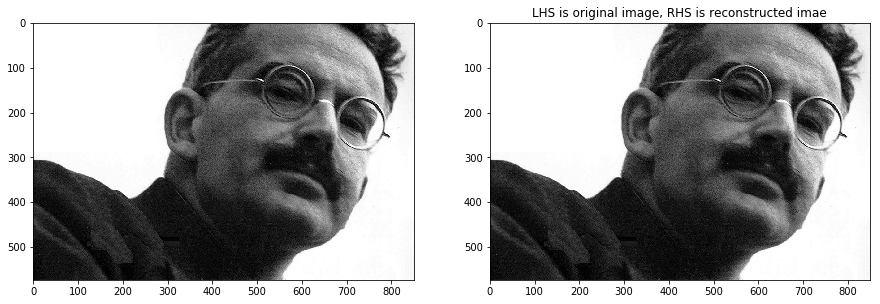

In [117]:
# Test your pyramid() and reconstruct_lp() here
##########################################    [TODO]    ##########################################
# Read in an image 
file_name = 'walterbenjamin.jpg'
image = cv2.imread(file_name,0).astype(float)
# Generate the Gaussian and Laplacian pyramid of the image by using pyramid()
gp, lp = pyramid(image)
# Reconstruct the image from Laplacian pyramid
rec_img = reconstruct_lp(lp)
# Plot the reconstructed image and the original image
_,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(rec_img,cmap='gray')
plt.title('LHS is original image, RHS is reconstructed imae')
plt.show()

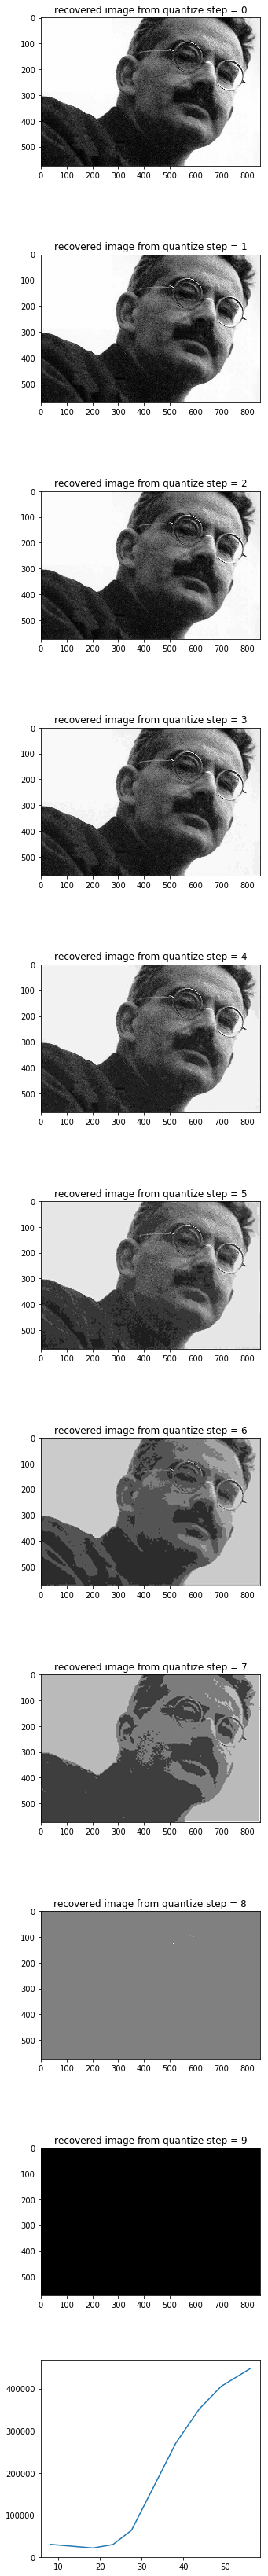

In [218]:
# Test your quantize() function and plot the results here
##########################################    [TODO]    ##########################################
# Read in an imaage
file_name = 'walterbenjamin.jpg'
image = cv2.imread(file_name,0).astype(float)
n = 10    # The level of quantization ( Q = 1, 2, 4, ... , 2^(n-1) )
rec_image_quant = np.zeros([n, image.shape[0], image.shape[1]]) # Reconstructed images array
num = np.zeros(n)  # Number of non-zeros array 
psnr = np.zeros(n) # PSNR array
Q = np.zeros(n)    # Q array 
# Use quantize() to quantize the Laplacian pyramid of the image with Q = 1, 2, 4, ... , 2^(n-1)
_,ax = plt.subplots(n+1,1,figsize=(5, 60))

for i in range(n):
    Q[i] = 2**i
    rec_image_quant[i], num[i], psnr[i] = quantize(image,Q[i])
    ax[i].imshow(rec_image_quant[i],cmap='gray')
    ax[i].set_title('recovered image from quantize step = ' + str(i))
# Plot the reconstructed images correspondingly .
# Plot the curve of psnr vs number of non-zeros
ax[n].plot(psnr, num)
plt.show()

## PART 2
**a)** Write a function that can generate a 3-level wavelet transform of an image. You could use the function pywt.dwt2( ) to generate one-level wavelet decomposition. Choose Daubechies (db) wavelet and “symmetric” for boundary treatment. Ideally you would organize your data so that all the wavelet subimages together are stored in a 2D arrange as the original image. 

**b)** Write a function that can reconstruct the original image from its wavelet transform subimages. You can use the function pywt.idwt2( ).

**c-d)** Repeat c-d) for Prob. 1 but on the wavelet subimages. 

**Note: If your functions from part (a),(b) are not working, you can use pywt.wavedec2() to generate the wavelet coefficients and pywt.waverec2() to reconstruct the image for part (c),(d)**

**Please note the wavelet coefficients returned by pywt.wavedec2() function are stored in a different structure as the gen_wavelet( ) function defined here. You would need to modify the Q_wavelet function properly.**

In [230]:
# Generate the wavelet coefficients for the image
# INPUT : 2D NP ARRAY REPRESENTING THE IMAGE
# OUTPUT : WAVELET COEFFICIENTS 

# NOTE: THE WAVELET COEFFICIENTS SHOULD BE RETURNED IN THE FORM OF A LIST SHOWN BELOW
# [[SMALL SCALE REPRESENTATITON OF IMAGE,[LIST OF LEN 3 LEVEL 3 REPRESENTATION OF IMAGE]],[LIST OF LEN 2 LEVEL 2 COEFFICIENTS],[LIST OF LEN 3 LEVEL 1 COEFFICIENTS]]
def gen_wavelet(img):
    levels = 3
    img_wavlets = [None]*levels
    temp = img
    # padding zeros to make the dimentions even
    for i in range(levels-1,-1,-1):
        r,c = temp.shape
        if c%2 != 0:
            temp = np.hstack((temp,np.zeros((r,1))))
            c += 1
        if r%2 != 0:
            temp = np.vstack((temp,np.zeros((1,c))))
            r += 1
        ##########################################    [TODO]    ##########################################
        # Similarly do it for rows
        ##########################################    [TODO]    ##########################################
        # call the dwt2 function to generate wavelet coefficients
        temp, (B,C,D) = pywt.dwt2(temp, wavelet='db1', mode='symmetric')
        ##########################################    [TODO]    ##########################################
        # Store B,C,D in the structure shown above
        img_wavlets[i] = [B,C,D]
    img_wavlets[0] = [temp,img_wavlets[0]]
    return img_wavlets

In [231]:
# Function used purely to display the coefficients of the wavelet transform
# Stack all the wavelet subimages together in the shape of the original image. 
def wv_stack(ls):
    for i in range(len(ls)):
        if i == 0:
            A,(B,C,D) = ls[i]
            H1 = np.hstack((A,B))
            H2 = np.hstack((C,D))
            temp = np.vstack((H1,H2))
        else:
            B,C,D = ls[i]
            r,c = temp.shape
            r1,c1 = B.shape
            if r1 != r:
                temp = temp[:-1,:]
            if c1 != c:
                temp = temp[:,:-1]
            H1 = np.hstack((temp,B))
            H2 = np.hstack((C,D))
            temp = np.vstack((H1,H2))
    return temp

In [271]:
# reconstruct the image from the wavelet coeffcients
# INPUT: WAVELET COEFFICIENTS IN THE FORM AS MENTIONED IN THE GEN_WAVELET FUNCTION
# OUTPUT: RECONSTRUCTED IMAGE
def gen_iwavelet(coeff):
    temp = pywt.idwt2(coeff[0],'db1','symmetric')
    for lv in coeff[1:]:
        ##########################################    [TODO]    ##########################################
        # Write code segment to make sure the image reconstruction(temp) is of the same size as the coefficients on one higher level
        # The temp variable generated abpve may not have the same dimension as the higher level wavelet coefficients.
        # run an if statement to verify if temp.shape == lv.shape 
                
        if temp.shape[0] != lv[0].shape[0]:
            temp = temp[0:-1,:]
        if temp.shape[1] != lv[0].shape[1]:
            temp = temp[:,0:-1]
            
        temp = (temp,lv) # pywt.idwt2() takes in coefficients in the form of [A,(B,C,D)]
        ##########################################    [TODO]    ##########################################
        # Perform inverse wavelet transform
        temp = pywt.idwt2(temp,'db1','symmetric')
    return temp   

In [233]:
# function to calculate the psnr
# input : #1- noisy image , #2- original image as reference
# OUTPUT: PSNR value
def psnr(img,ref):
    ##########################################    [TODO]    ##########################################
    # Write the code to find the psnr
    mse = np.mean((img-ref)**2)
    psnr = 10*np.log10(256**2/mse)
    return psnr

In [234]:
def Q_wavelet(img,Q): # image,Quantization step
    ##########################################    [TODO]    ##########################################
    # generate teh wavelet coefficnets using gen_wavelet
    coeff = gen_wavelet(img)
    levels = 3
    for i in range(levels):
        if i == 0:
            mean = 128
            ##########################################    [TODO]    ##########################################
            # perform quantization using the formula provided
            # quantized_lp[2] = np.floor((lp[2]-mean[2]+Q/2)/Q)*Q + mean[2]
            coeff[i][0] = np.floor((coeff[i][0]-mean+Q/2)/Q)*Q + mean
            mean = 0
            for j in range(levels):
                ##########################################    [TODO]    ##########################################
                # perform quantization using the formula provided
                coeff[i][1][j] = np.floor((coeff[i][1][j]-mean+Q/2)/Q)*Q + mean
        else:
            mean = 0
            ##########################################    [TODO]    ##########################################
            # perform quantization using the formula provided
            for j in range(3):
                coeff[i][j] = np.floor((coeff[i][j]-mean+Q/2)/Q)*Q + mean
            
    # finished quantization
    # count number of zero values
    
    nz_ele = 0
    ##########################################    [TODO]    ##########################################
    # Write code segment to count number of non-zero values. Use np.count_nonzero function
    coeff_stacked = wv_stack(coeff)
    nz_ele =  np.count_nonzero(coeff_stacked)
    
    ##########################################    [TODO]    ##########################################
    # Reconstruct the image
    img_rec = gen_iwavelet(coeff)
    
    ##########################################    [TODO]    ##########################################
    # Make sure the reconstructed image and original are of the same shape
    
    if img_rec.shape[0] != img.shape[0]:
        img_rec = img_rec[0:-1,:]
    if img_rec.shape[1] != img.shape[1]:
        img_rec = img_rec[:,0:-1]

    ##########################################    [TODO]    ##########################################
    # Calculate the psnr
    psnr_ = psnr(img, img_rec)
    return psnr_, nz_ele,img_rec

In [235]:
# Main function for part 2
def main2(filename):
    ##########################################    [TODO]    ##########################################
    # Read in the image
    img = cv2.imread(file_name,0).astype(float)
    
    ##########################################    [TODO]    ##########################################
    # Generate wavelet coefficients and plot the coefficients in standard form using wv_stack function
    img_wavlets = gen_wavelet(img)
    stacked_wavlets = wv_stack(img_wavlets)
    
    ##########################################    [TODO]    ##########################################
    # Reconstruct the image using gen_iwavelet function and display output
    img_reconstruct = gen_iwavelet(img_wavlets)
    
    plt.show()

    ##########################################    [TODO]    ##########################################
    # Set quantization levels
    Q = np.logspace(0, 9, num=10, base=2) # array saving quantization values
    print('Q:',Q)
    _,ax = plt.subplots(len(Q)+4,1,figsize=(5,60))
    ax[len(Q)].imshow(stacked_wavlets,cmap='gray')
    ax[len(Q)+1].imshow(img_reconstruct,cmap='gray')
    
    Q_imgs = [None]*len(Q) # list to hold quantized images
    psnr_arr = [None]*len(Q) # list to hold the psnr values
    nz_arr = [None]*len(Q) # list to hold `non-zero element` values for different quentization levels
    
    ##########################################    [TODO]    ##########################################
    # Write code segment to calculate the wavelet transform for the image, quantize with different Q,
    # Add the values to the Q_imgs,psnr_arr,nz_arr lists accordingly
    for i in range(len(Q)):
        psnr_arr[i], nz_arr[i], Q_imgs[i] = Q_wavelet(img, Q[i])
    
    ##########################################    [TODO]    ##########################################
    # plot Q vs non-zero piexl count
    # plot non-zero pixel count vs psnr
    ax[len(Q)+2].plot(np.arange(10),nz_arr)
    ax[len(Q)+3].plot(psnr_arr, nz_arr)
    
    # PLotting all figures side by side with original to show the difference
    for i in range(len(Q)):
        ax[i].imshow(Q_imgs[i],cmap='gray')
        ax[i].set_title('q = {}'.format(Q[i]))
        pass
    plt.show()
    

Q: [  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]


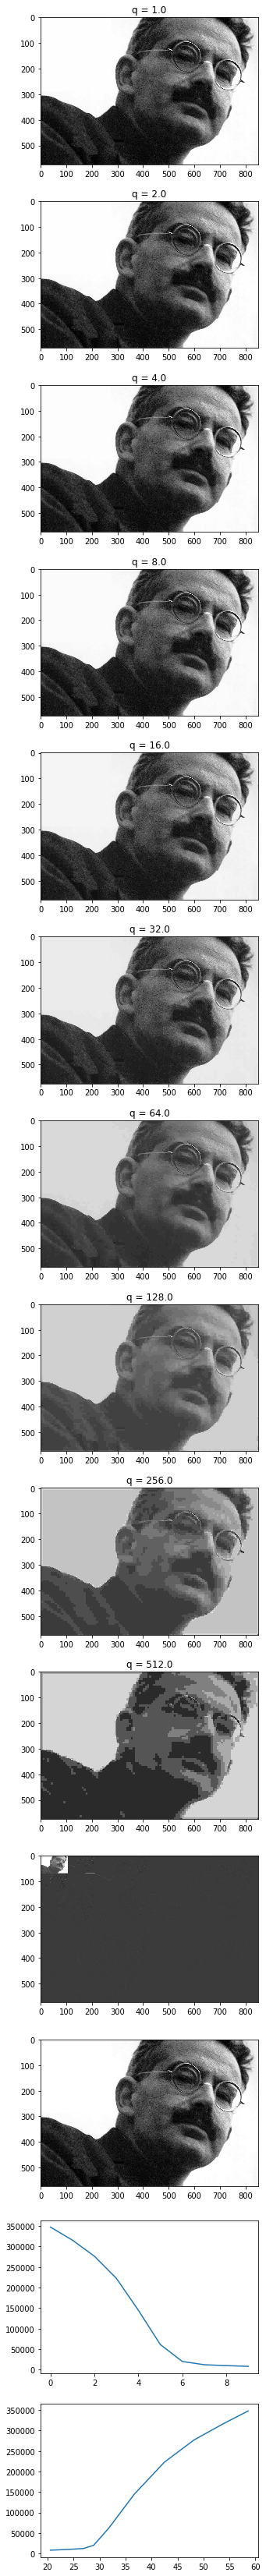

In [217]:
# Call the main function
file_name = 'walterbenjamin.jpg'
main2(file_name)


## PART 3
Write a main program that i) reads in an image, ii) add Gaussian random noise with a noise level at 5% of the image dynamic range;  iii) Generate the wavelet image using your function from Prob. 2(a); iv) Perform denoising using soft thresholding on  the Wavelet image. For any coefficient with value f, and a threshold T, the soft thresholded value is defined as
![formula1](formula1.png)

v) Reconstruct the denoised image from the thresholded Wavelet image using your function from Prob. 2(b). vi) Evaluate the quality of denoising by computing the PSNR of the original image (without noise) and denoised image. Vii) Recall that the threshold T should be chosen based on the noise variance and the wavelet coefficient variance, following $T =\frac{\sqrt{2}\sigma_n^{2}}{\sigma}$
, where $\sigma_n^{2}$
is the noise variance,  $\sigma^{2}$ is the variance of the wavelet coefficients (only the high band signals).  Your program should estimate the coefficient variance for each band and use the corresponding threshold when performing soft thresholding on the wavelet image. You can use this link to find the formulae required:[Prof. Selesnick Notes](http://eeweb.poly.edu/iselesni/lecture_notes/SoftThresholding.pdf)

**Note: If your functions from the previous parts are not working, you can use pywt.wavedec2() to generate the wavelet coefficients and pywt.waverec2() to reconstruct the image for the following part.**

**Please note the wavelet coefficients returned by pywt.wavedec2() function are stored in a different structure as the gen_wavelet( ) function defined here. You would need to modify the wavelet_denoising function properly.**


In [281]:
# Perform soft thresholding on the Wavelet image for performing denoising
def wave_denoising(img):# image,noise stddev
    levels = 3
    DR = np.max(img) - np.min(img) # CALCULATING DYNAMIC RANGE
    
    ##########################################    [TODO]    ##########################################
    # Generate and add Gaussian random noise with a noise level at 5% of the image dynamic range
    sigma_n = DR*0.05
    n = np.random.randn(*img.shape)*sigma_n

    img_n = img + n # define noisy image
    ##########################################    [TODO]    ##########################################
    # generate wavelet coefficients using gen_wavelet function
    img_wavlets = gen_wavelet(img_n)
    THRESH = [] # defining a list to store thresholding coefficients
    
    # calculating coefficient based threshold
    
    tshold = lambda x : (np.sqrt(2)*(sigma_n**2))/np.sqrt(max(np.mean(x**2)-sigma_n**2,0))
    
    for i in range(levels):
        if i == 0:
            A,[B,C,D] = img_wavlets[i]
            ##########################################    [TODO]    ##########################################
            # find the different sub-band thresholds using the formula specified slesnisck notes[Link specified in assignment doc.
            # Note that soft thresholding should not be done on the very top level low-frequency image.
                        
            t_B = tshold(B)
            t_C = tshold(C)
            t_D = tshold(D)
            THRESH.extend([[t_B,t_C,t_D]])
        else:
            ##########################################    [TODO]    ##########################################
            B,C,D = img_wavlets[i]
            t_B = tshold(B)
            t_C = tshold(C)
            t_D = tshold(D)
            THRESH.extend([[t_B,t_C,t_D]])
            
    for i in range(levels):
        ##########################################    [TODO]    ##########################################
        # call pywt.threshold to threshold img_wavlets[i]
        # Note that soft thresholding should not be done on the very top level low-frequency image.            
        
        if i == 0:
            for j in range(len(img_wavlets[0][1])):
                img_wavlets[i][1][j] = pywt.threshold(img_wavlets[0][1][j], THRESH[i][j])
        else:
            for j in range(len(img_wavlets[i])):
                img_wavlets[i][j] = pywt.threshold(img_wavlets[i][j], THRESH[i][j])
    ##########################################    [TODO]    ##########################################
    # use gen_iwavlets to recontruct the image
    # make sure the shape of the reconstructed image is the same as the original image
    img_rec = gen_iwavelet(img_wavlets)
    
    return img_n, img_rec
    

In [282]:
# Main function for part 3
def main3(filename):
    ##########################################    [TODO]    ##########################################
    # READ THE IMAGE
    img = cv2.imread(file_name,0).astype(float)
    
    # thresholding image 
    ##########################################    [TODO]    ##########################################
    # call the denoising function using wav_denoising
    img_noise,img_rec = wave_denoising(img)

    ##########################################    [TODO]    ##########################################
    # calculating the psnr and print it
    
    mse = np.mean((img-img_rec)**2)
    PSNR = 10*np.log10(256**2/mse)
    print('PSNR using wavelet is {0:.2f}'.format(PSNR))

    ##########################################    [TODO]    ##########################################
    # Display the original, noisy and denoised image 
    f = plt.figure(1,figsize = (20,20))
    ax0 = f.add_subplot(131)
    ax1 = f.add_subplot(132)
    ax2 = f.add_subplot(133)
    ax0.imshow(img, cmap='gray')
    ax0.set_title('original image')
    ax1.imshow(img_noise, cmap='gray')
    ax1.set_title('noisy image')
    ax2.imshow(img_rec, cmap='gray')
    ax2.set_title('recovered image')
    # similarly plot the other figures
    plt.show()

PSNR using wavelet is 29.91


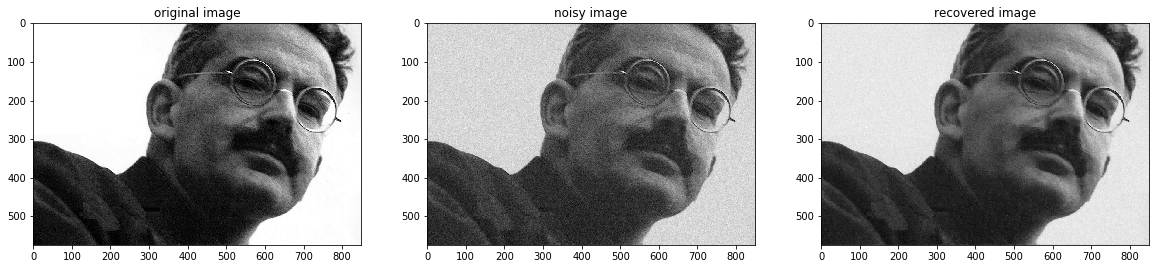

In [283]:
# Calling the main function for part 3
file_name = 'walterbenjamin.jpg'
main3(file_name)

## PART 4
 - For the same noise-added image, try to reduce the noise using the following smoothing filter and compute the PSNR between the denoised image and the original image. 
![matrix](matrix.png)



PSNR using convolution is 28.26


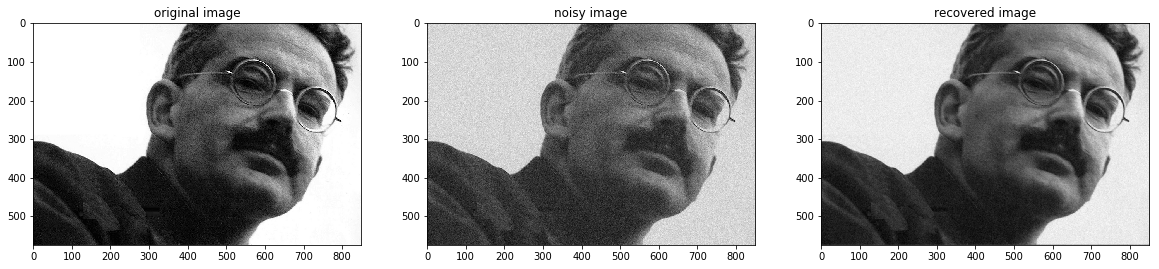

In [279]:
file_name = 'walterbenjamin.jpg'
img = cv2.imread(file_name,0)
DR = np.max(img) - np.min(img)
##########################################    [TODO]    #########################################
# Add 5% gaussian noise to the image
sigma_n = DR*0.05
n = np.random.randn(*img.shape)*sigma_n
img_n = img + n

##########################################    [TODO]    #########################################
# define the kernel and call cv2.filter2D() to reduce the noise 
KERNEL = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
img_filt = cv2.filter2D(img_n, -1, KERNEL)

##########################################    [TODO]    #########################################
# call the psnr function to find the psnr of the denoised image and print that value

mse = np.mean((img-img_filt)**2)
PSNR = 10*np.log10(256**2/mse)
print('PSNR using convolution is {0:.2f}'.format(PSNR))

##########################################    [TODO]    #########################################
# Displaying the images img and img_filt
f = plt.figure(1,figsize = (20,20))
ax0 = f.add_subplot(131)
ax1 = f.add_subplot(132)
ax2 = f.add_subplot(133)
ax0.imshow(img, cmap='gray')
ax0.set_title('original image')
ax1.imshow(img_n, cmap='gray')
ax1.set_title('noisy image')
ax2.imshow(img_filt, cmap='gray')
ax2.set_title('recovered image')
# similarly plot the other figures
plt.show()


# Discussion: 

1) Based on the results in Prob. 1(c) and 2(c), compare the representation efficiency of Laplacian pyramid vs. wavelet transform.

2) Based on the results in Prob. 3 and 4, compare the denoising performance of the two methods.  Pay attention not only to noise suppression but also detail preserving.


* wavelet transform is much more effective than Laplacian, using 350000 non-zero to reach PSNR 60, but Laplacian using 450000 to reach 60, the difference is around 3:4
* the PSNR of wavelet and kernel method is not as significantly as representation, probably because we use a small and corase wavelet core db1. But it looks better in terms of edge and detail preservation

## OPTIONAL


 -  You can try different down-sampling and interpolation filters for pyramid representation; and different wavelet transforms, to see their effects on representation efficiency and denoising. You can also try different noise levels.

- Investigate the representation efficiency of block DCT (e.g. DCT over every 8x8 blocks) by following similar framework, and compare it to Wavelet and Laplacian pyramid.